
Mean and std for low_utilization:
ppo: 5.8 (0.5)
spt_policy: 5.9 (0.4)
fifo_policy: 5.8 (0.5)
random_policy: 6.7 (0.7)


C:\Users\jeroe\AppData\Local\Temp\ipykernel_201300\46496224.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


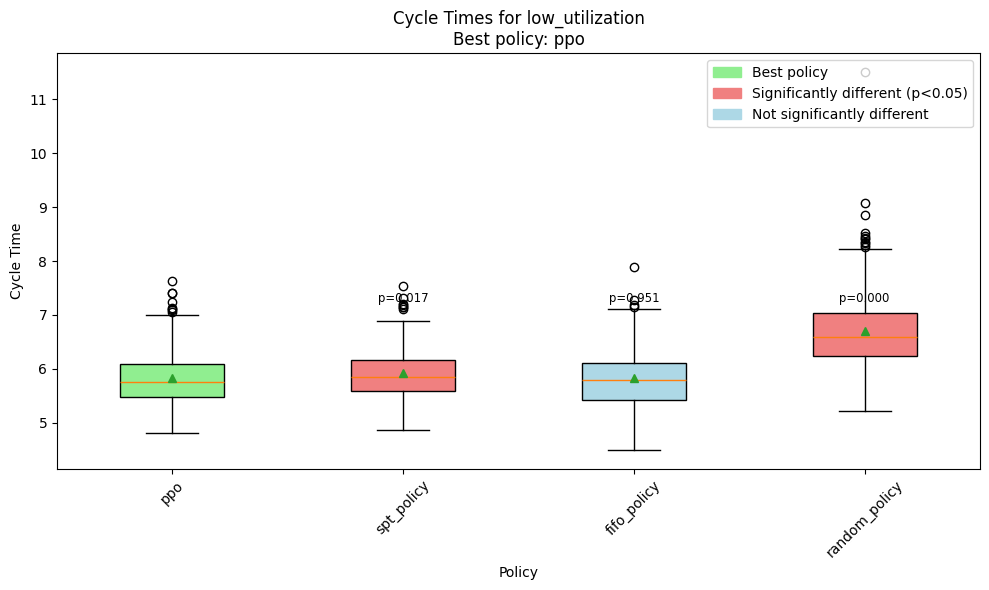

C:\Users\jeroe\AppData\Local\Temp\ipykernel_201300\46496224.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)



Significance test results for low_utilization:
Best policy: ppo (Mean: 5.83)
--------------------------------------------------
spt_policy vs ppo: p-value = 0.01697 (significant)
fifo_policy vs ppo: p-value = 0.95054 (not significant)
random_policy vs ppo: p-value = 0.00000 (significant)



Mean and std for high_utilization:
ppo: 19.5 (5.6)
spt_policy: 19.7 (5.3)
fifo_policy: 25.7 (10.7)
random_policy: 34.7 (18.2)


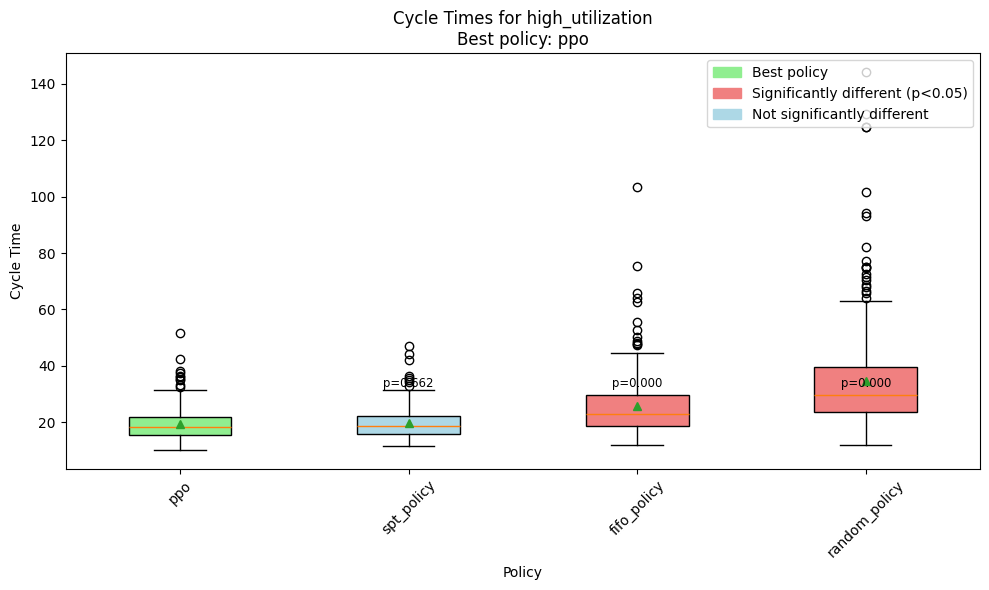


Significance test results for high_utilization:
Best policy: ppo (Mean: 19.51)
--------------------------------------------------
spt_policy vs ppo: p-value = 0.66161 (not significant)
fifo_policy vs ppo: p-value = 0.00000 (significant)
random_policy vs ppo: p-value = 0.00000 (significant)



Mean and std for slow_server:
ppo: 11.9 (2.1)
spt_policy: 29.0 (11.5)
fifo_policy: 18.6 (6.7)
random_policy: 22.4 (7.1)


C:\Users\jeroe\AppData\Local\Temp\ipykernel_201300\46496224.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


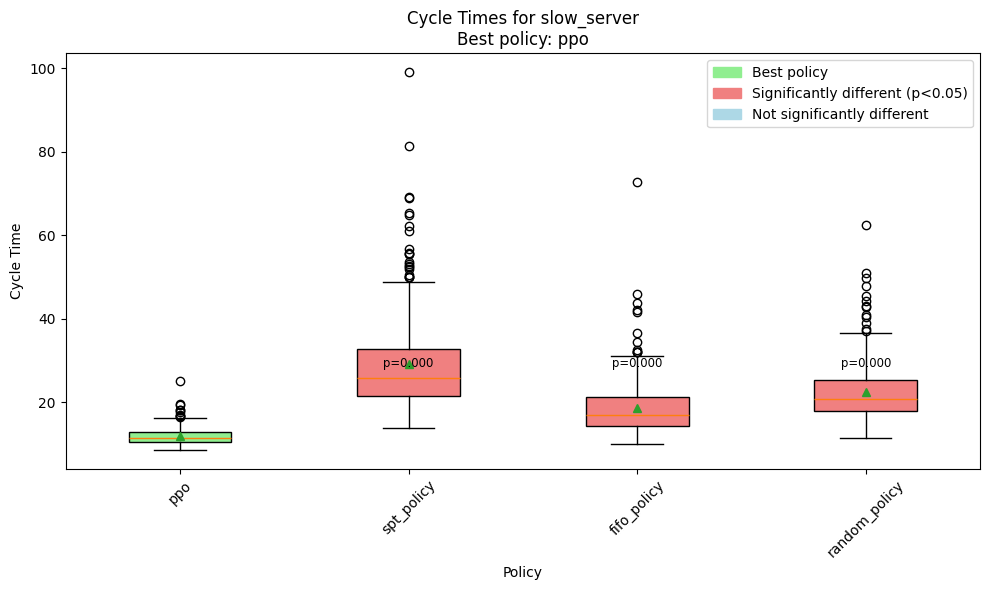


Significance test results for slow_server:
Best policy: ppo (Mean: 11.88)
--------------------------------------------------
spt_policy vs ppo: p-value = 0.00000 (significant)
fifo_policy vs ppo: p-value = 0.00000 (significant)
random_policy vs ppo: p-value = 0.00000 (significant)



Mean and std for down_stream:
ppo: 10.3 (1.9)
spt_policy: 14.7 (3.1)
fifo_policy: 10.1 (1.8)
random_policy: 11.8 (2.1)


C:\Users\jeroe\AppData\Local\Temp\ipykernel_201300\46496224.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


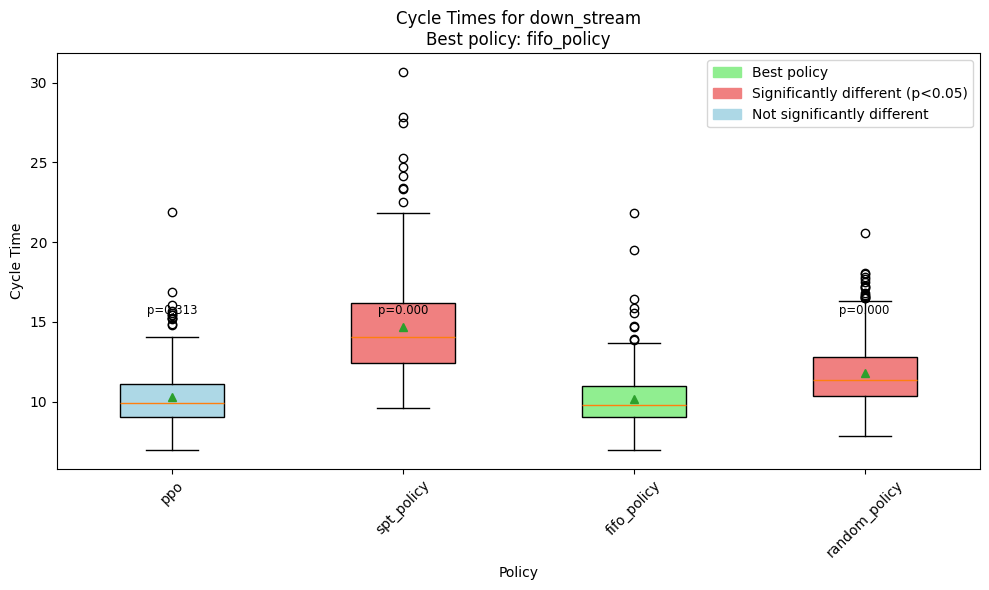


Significance test results for down_stream:
Best policy: fifo_policy (Mean: 10.14)
--------------------------------------------------
ppo vs fifo_policy: p-value = 0.31296 (not significant)
spt_policy vs fifo_policy: p-value = 0.00000 (significant)
random_policy vs fifo_policy: p-value = 0.00000 (significant)



Mean and std for n_system:
ppo: 6.0 (0.5)
spt_policy: 7.2 (1.1)
fifo_policy: 5.9 (0.5)
random_policy: 6.4 (0.8)


C:\Users\jeroe\AppData\Local\Temp\ipykernel_201300\46496224.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


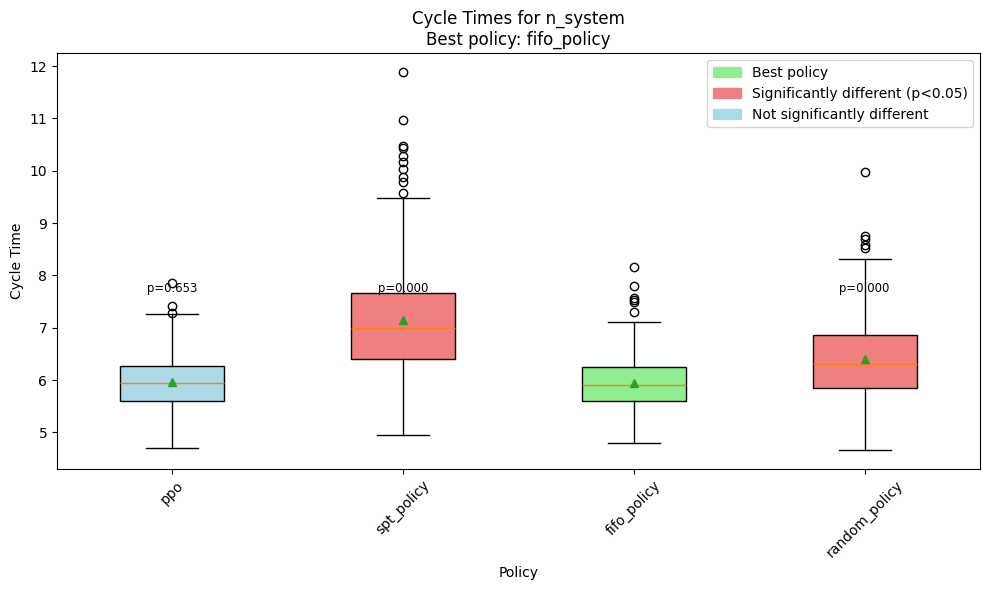


Significance test results for n_system:
Best policy: fifo_policy (Mean: 5.95)
--------------------------------------------------
ppo vs fifo_policy: p-value = 0.65293 (not significant)
spt_policy vs fifo_policy: p-value = 0.00000 (significant)
random_policy vs fifo_policy: p-value = 0.00000 (significant)



Mean and std for parallel:
ppo: 9.6 (1.8)
spt_policy: 14.1 (3.3)
fifo_policy: 9.5 (1.8)
random_policy: 11.0 (2.1)


C:\Users\jeroe\AppData\Local\Temp\ipykernel_201300\46496224.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)


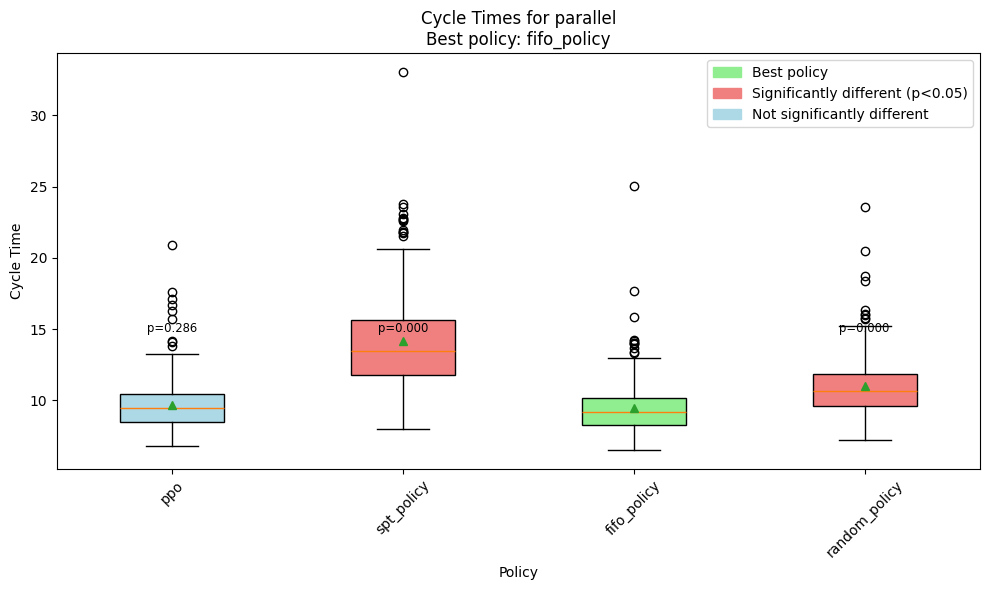


Significance test results for parallel:
Best policy: fifo_policy (Mean: 9.49)
--------------------------------------------------
ppo vs fifo_policy: p-value = 0.28575 (not significant)
spt_policy vs fifo_policy: p-value = 0.00000 (significant)
random_policy vs fifo_policy: p-value = 0.00000 (significant)




In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches

# Define the configuration types and policies
config_types = ['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system', 'parallel']
policies = ['ppo', 'spt_policy', 'fifo_policy', 'random_policy']

# Iterate over each configuration type
for config_type in config_types:
    data = []
    labels = []
    policy_data_dict = {}

    # Read data for each policy
    for policy in policies:
        file_path = f'results/{config_type}/{config_type}_{policy}.txt'
        if policy == 'ppo':
            file_path = f'results/{config_type}/{config_type}_{policy}.txt'
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            cycle_times = df['cycle_time']
            data.append(cycle_times)
            labels.append(policy)
            policy_data_dict[policy] = cycle_times
    
    # Create a box plot
    plt.figure(figsize=(10, 6))
    box = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)
    
    # Find the policy with the lowest median cycle time
    median_values = [np.median(d) for d in data]
    mean_values = [np.mean(d) for d in data]
    std_values = [np.std(d) for d in data]
    conf_intervals = [
        stats.t.interval(
            0.95, len(d)-1, loc=np.mean(d), scale=stats.sem(d)
        ) if len(d) > 1 else (np.nan, np.nan)
        for d in data
    ]

    best_policy_index = np.argmin(mean_values)
    best_policy = labels[best_policy_index]
    best_policy_data = data[best_policy_index]

    # Print mean and standard deviation for each policy
    print(f"\nMean and std for {config_type}:")
    for label, mean, std in zip(labels, mean_values, std_values):
        print(f"{label}: {mean:.1f} ({std:.1f})")

    # # Print mean and 95% confidence interval for each policy
    # print(f"\nMean and 95% CI for {config_type}:")
    # for label, mean, ci in zip(labels, mean_values, conf_intervals):
    #     half_width = (ci[1] - ci[0]) / 2
    #     print(f"{label}: {mean:.1f} ({half_width:.1f})")

    # Perform t-test between the best policy and all other policies
    p_values = []
    significance = []
    
    for i, (policy, policy_data) in enumerate(zip(labels, data)):
        if i == best_policy_index:
            p_values.append(1.0)  # Same distribution, p-value = 1
            significance.append(False)
        else:
            # Independent two-sample t-test
            stat, p = stats.ttest_ind(best_policy_data, policy_data, equal_var=True)  # Using Welch's t-test (unequal variance)
            p_values.append(p)
            significance.append(p < 0.05)  # Consider p < 0.05 as significant
    
    # Color the boxes based on significance
    for i, (patch, sig) in enumerate(zip(box['boxes'], significance)):
        if i == best_policy_index:
            patch.set_facecolor('lightgreen')  # Best policy in green
        elif sig:
            patch.set_facecolor('lightcoral')  # Significantly different in red
        else:
            patch.set_facecolor('lightblue')  # Not significantly different in blue
    
    # Add a legend
    best_patch = mpatches.Patch(color='lightgreen', label='Best policy')
    sig_patch = mpatches.Patch(color='lightcoral', label='Significantly different (p<0.05)')
    nonsig_patch = mpatches.Patch(color='lightblue', label='Not significantly different')
    plt.legend(handles=[best_patch, sig_patch, nonsig_patch], loc='upper right')
    
    # Add p-values above the boxes
    for i, p in enumerate(p_values):
        if i != best_policy_index:
            plt.text(i+1, max(median_values) * 1.1, f'p={p:.3f}', 
                     horizontalalignment='center', size='small')
    
    plt.title(f'Cycle Times for {config_type}\nBest policy: {best_policy}')
    plt.ylabel('Cycle Time')
    plt.xlabel('Policy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot
    # plot_path = f'results/{config_type}/{config_type}_boxplot_with_significance.png'
    # plt.savefig(plot_path)
    plt.show()
    
    # Print detailed test results
    print(f"\nSignificance test results for {config_type}:")
    print(f"Best policy: {best_policy} (Mean: {mean_values[best_policy_index]:.2f})")
    print("-" * 50)
    for i, policy in enumerate(labels):
        if i != best_policy_index:
            print(f"{policy} vs {best_policy}: p-value = {p_values[i]:.5f} {'(significant)' if significance[i] else '(not significant)'}")
    print("\n")

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


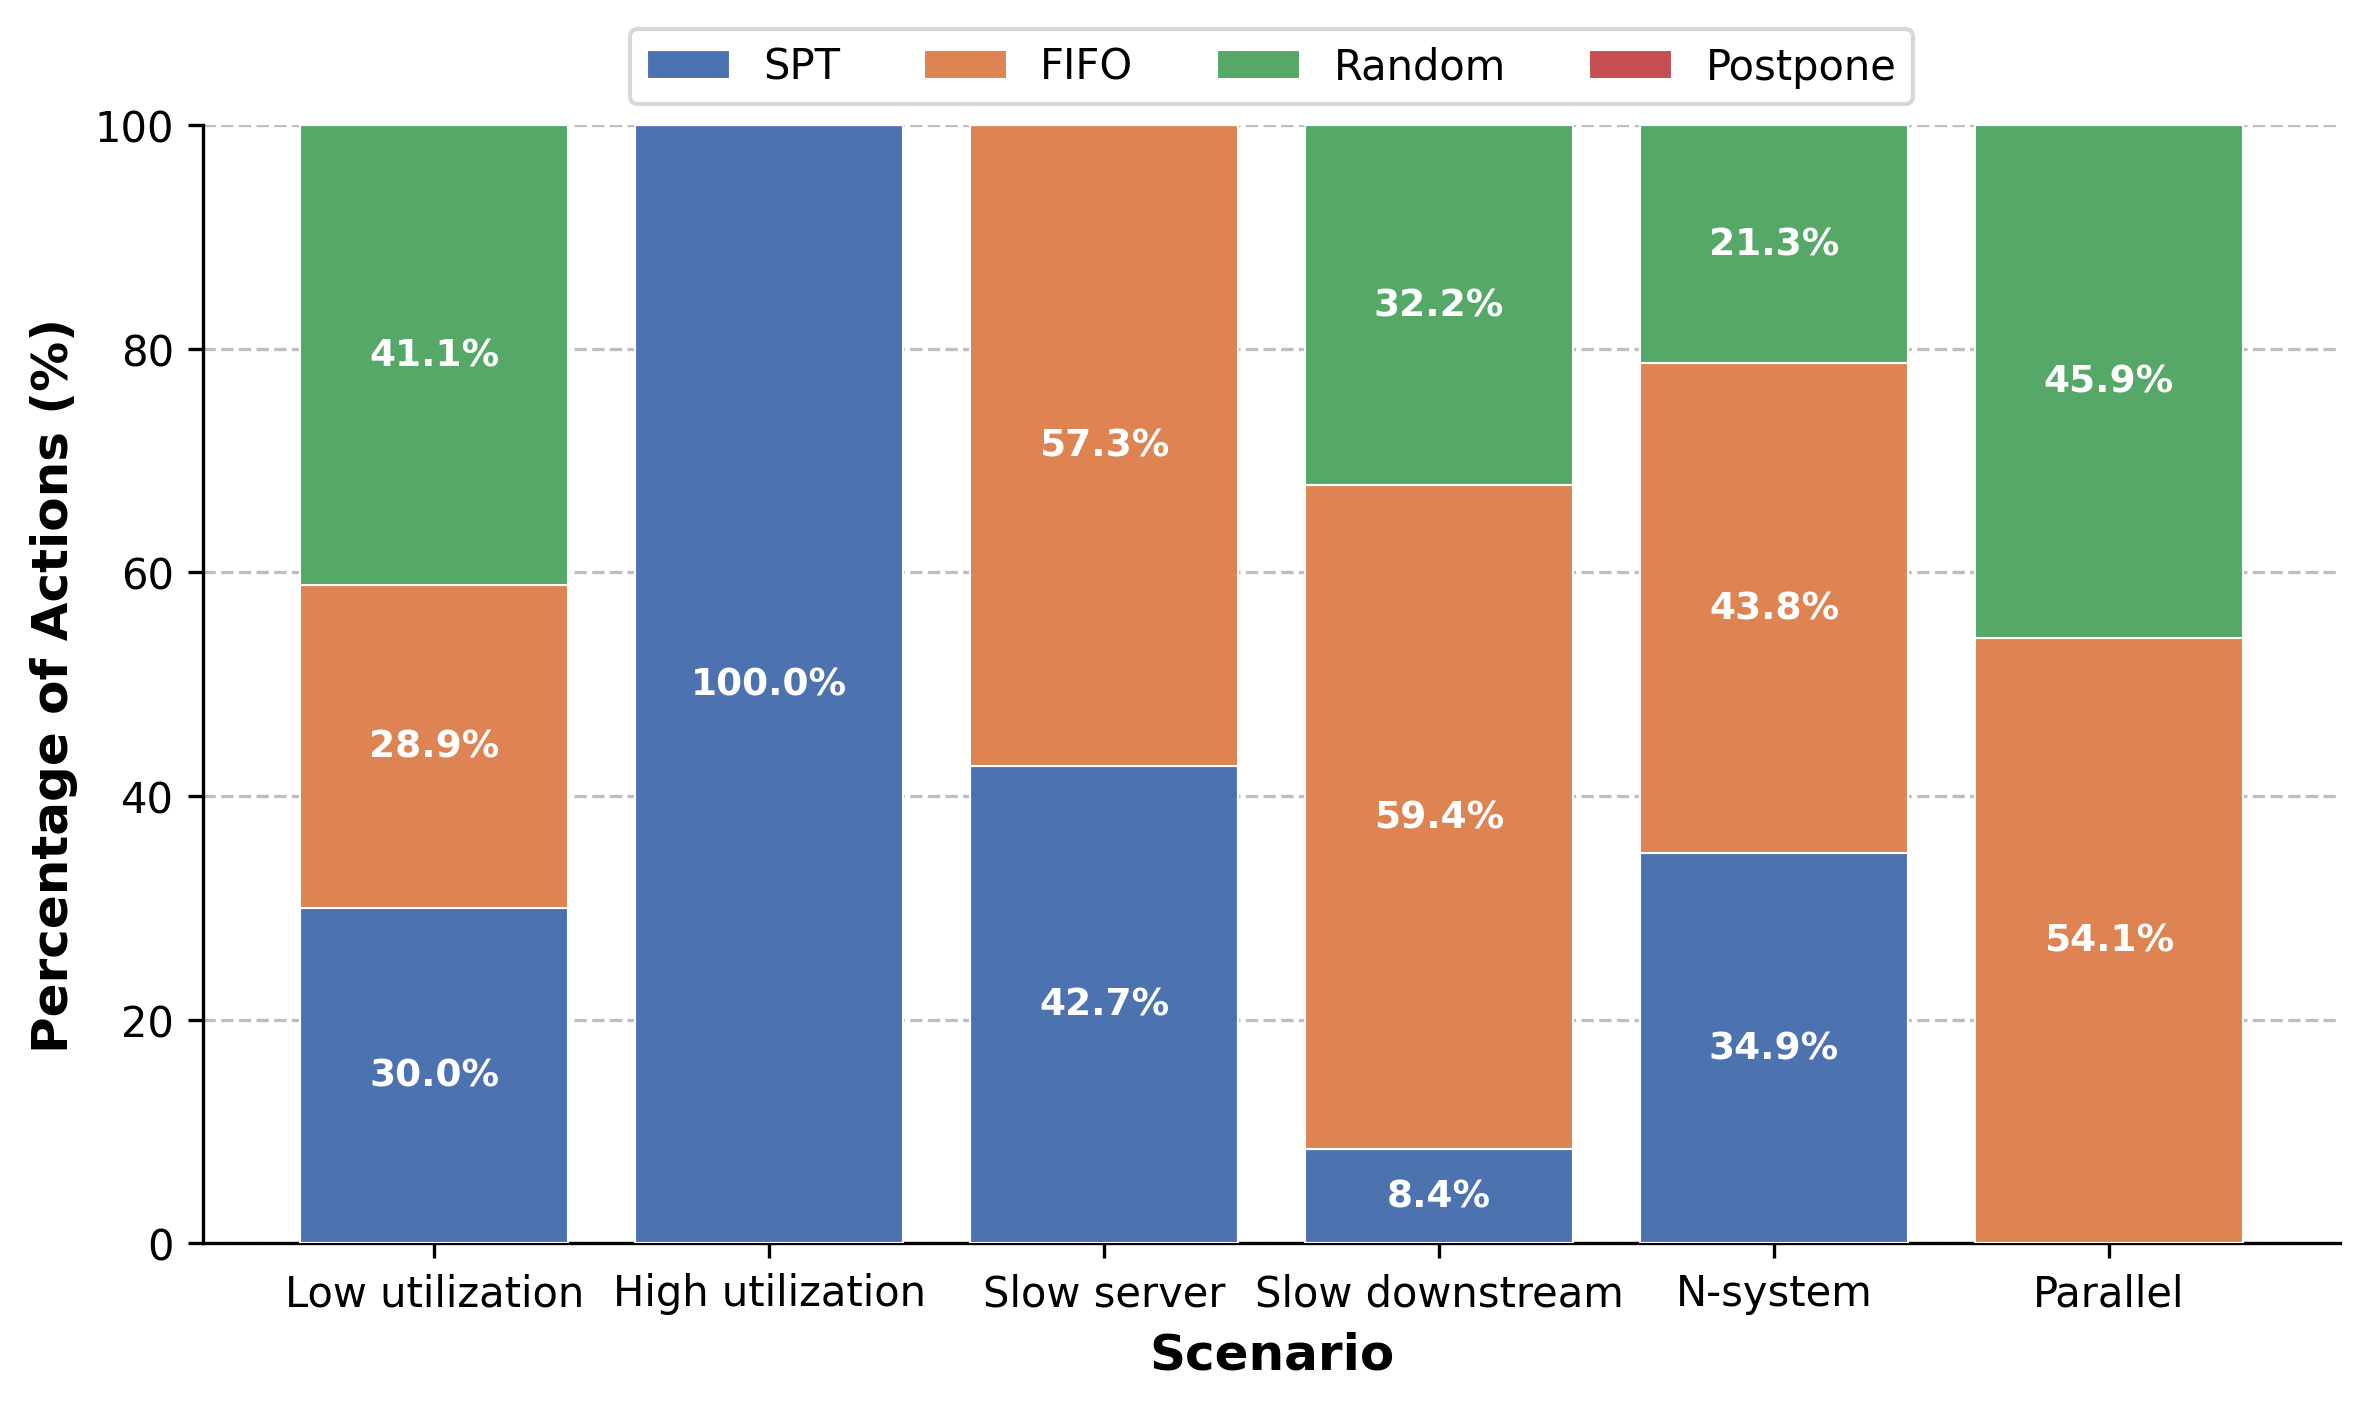

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Initialize a dictionary to store average action counts for each config type
action_counts_all = {policy: [] for policy in ['spt_policy', 'fifo_policy', 'random_policy', 'postpone']}
config_types = ['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system', 'parallel']
total_actions = []

config_labels = {'low_utilization': 'Low utilization',
                 'high_utilization': 'High utilization',
                 'slow_server': 'Slow server',
                 'down_stream': 'Slow downstream',
                 'n_system': 'N-system',
                 'parallel': 'Parallel'}

# Iterate over each configuration type
for config_type in config_types:
    ppo_file_path = f'results/{config_type}/{config_type}_ppo.txt'
    if os.path.exists(ppo_file_path):
        ppo_df = pd.read_csv(ppo_file_path)
        
        # Calculate the mean of each action across all episodes
        action_means = ppo_df[['spt_policy', 'fifo_policy', 'random_policy', 'postpone']].mean()
        
        # Calculate total actions for this config type
        total = action_means.sum()
        total_actions.append(total)
        
        # Append the percentage of each action to the dictionary
        for policy in action_means.index:
            action_counts_all[policy].append((action_means[policy] / total) * 100)

# Create a stacked bar chart
plt.figure(figsize=(8, 4.8), dpi=300)  # Higher resolution, better aspect ratio

# Use a professional, colorblind-friendly palette
# Use a professional, colorblind-friendly palette with 4 colors instead of 3

colors = sns.color_palette('deep', 4)
print(sns.color_palette("deep").as_hex())
#colors = ['#3274A1', '#E1812C', '#3A923A', '#D42A2F']  # Blue, Orange, Green, Red
bottom = np.zeros(len(config_types))

# Better labels for the legend
action_labels = {
    'spt_policy': 'SPT',
    'fifo_policy': 'FIFO',
    'random_policy': 'Random',
    'postpone': 'Postpone'
}

# Add subtle grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.8, zorder=0)

# Initialize bars dictionary to store the bar plot objects
bars = {}

# Plot each policy with improved styling
for i, (policy, percentages) in enumerate(action_counts_all.items()):
    bars[policy] = plt.bar([config_labels[config_type] for config_type in config_types],
                           percentages, bottom=bottom, label=action_labels[policy],
                           color=colors[i], edgecolor='white', linewidth=0.5,
                           zorder=3)
    
    # Add percentage labels for segments larger than 10%
    for j, (pct, btm) in enumerate(zip(percentages, bottom)):
        if pct > 5:  # Only show label if percentage is large enough
            plt.text(j, btm + pct/2, f'{pct:.1f}%', 
                     ha='center', va='center', fontsize=9, 
                     color='white', fontweight='bold')
    
    bottom += np.array(percentages)

# Improve axes and labels
plt.ylabel('Percentage of Actions (%)', fontsize=12, fontweight='bold')
plt.xlabel('Scenario', fontsize=12, fontweight='bold')

# Improve tick parameters
#plt.xticks(rotation=15, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Remove top and right spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Better legend placement and styling
plt.legend(fontsize=10, bbox_to_anchor=(0.5, 1.00), loc='lower center',
           framealpha=0.9, edgecolor='lightgray', ncol=4)

plt.ylim(0, 100)
plt.tight_layout()

# Optional: save in high resolution for publication
plt.savefig('figures/action_distribution_scenarios.pdf', bbox_inches='tight', dpi=300)
plt.savefig('figures/action_distribution_scenarios.png', bbox_inches='tight', dpi=300)

plt.show()